#### The Agenda is to find whether Spending Habits and Healthy Lifestyle is related to Gender and Place or not.
#### The data file consists of both  integers and categorical values.
#### For this Project we consider 2 sections of data –  Health Habits and Spending Habits

#####  Health Habits - I live a very healthy lifestyle. Here Strongly disagree 1-2-3-4-5 Strongly agree
##### Spending Habits - I save all the money I can.: Strongly disagree 1-2-3-4-5 Strongly agree



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Habits = pd.read_csv("responses.csv")
Habits

In [2]:
Habits.isnull().sum()
Habits[Habits.isnull().any(axis=1)]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
8,5.0,3.0,3.0,1.0,1.0,2.0,4.0,3.0,5.0,5.0,...,18.0,166.0,55.0,1.0,female,right handed,secondary school,no,city,house/bungalow
15,1.0,3.0,2.0,2.0,3.0,4.0,3.0,3.0,5.0,5.0,...,18.0,177.0,77.0,0.0,male,right handed,secondary school,yes,city,block of flats
17,5.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,...,20.0,168.0,65.0,1.0,female,right handed,secondary school,no,village,house/bungalow
22,5.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0,NaN,1.0,...,22.0,167.0,70.0,1.0,female,right handed,college/bachelor degree,no,city,house/bungalow
27,4.0,5.0,3.0,4.0,1.0,3.0,2.0,2.0,4.0,2.0,...,19.0,163.0,50.0,1.0,female,right handed,secondary school,no,city,house/bungalow
37,5.0,5.0,1.0,1.0,1.0,5.0,1.0,2.0,3.0,5.0,...,21.0,185.0,101.0,1.0,male,right handed,secondary school,no,city,block of flats
45,5.0,4.0,5.0,2.0,2.0,4.0,3.0,5.0,4.0,1.0,...,27.0,181.0,78.0,1.0,male,right handed,masters degree,no,NaN,block of flats
46,5.0,3.0,4.0,3.0,4.0,1.0,5.0,5.0,5.0,3.0,...,21.0,163.0,55.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats
47,5.0,3.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0,2.0,...,19.0,170.0,60.0,1.0,female,right handed,secondary school,yes,city,house/bungalow


In [3]:
# The columns of our interest are Finances and healthy eating  for Gender and Village-town , so we only need them
Habits = Habits.loc[:,['Finances','Gender','Village - town','Healthy eating']]

In [4]:
Habits.shape

(1010, 4)

In [5]:
Habits.describe().T

,count,mean,std,min,25%,50%,75%,max
Finances,1007.0,3.023833,1.144365,1.0,2.0,3.0,4.0,5.0
Healthy eating,1007.0,3.031778,0.936865,1.0,3.0,3.0,4.0,5.0


In [6]:
Habits.columns.str.find('Healthy eating')

Int64Index([-1, -1, -1, 0], dtype='int64')

In [7]:
Habits.groupby('Gender').count()

,Finances,Village - town,Healthy eating
Gender,,,
female,591,591,592
male,410,409,409


In [8]:
Habits.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Finances          1007 non-null float64
Gender            1004 non-null object
Village - town    1006 non-null object
Healthy eating    1007 non-null float64
dtypes: float64(2), object(2)
memory usage: 31.6+ KB


### As we see, the data has null values in few cells and we need to impute these values.
### Though we might like to remove the null rows of categorical gender and village-town values as data is large enough.Still we can impute it by mode.  Also, impute remaining  numeric nan values with median 

In [9]:
Habits['Healthy eating'].groupby(Habits['Gender']).median()

Gender
female    3.0
male      3.0
Name: Healthy eating, dtype: float64

In [10]:
Habits['Healthy eating'].groupby(Habits['Village - town']).median()

Village - town
city       3.0
village    3.0
Name: Healthy eating, dtype: float64

In [11]:
Habits['Finances'].groupby(Habits['Village - town']).median()

Village - town
city       3.0
village    3.0
Name: Finances, dtype: float64

In [12]:
Habits[['Finances','Healthy eating']].median()

Finances          3.0
Healthy eating    3.0
dtype: float64

In [13]:
Habits.filter(["Gender", "Village - town"]).mode()

,Gender,Village - town
0,female,city


### With above information we can impute the numerical and categorival values.

In [14]:
Habits.loc[Habits.isnull().any(axis =1)] 

,Finances,Gender,Village - town,Healthy eating
45,4.0,male,NaN,5.0
137,4.0,NaN,village,1.0
201,2.0,NaN,village,3.0
219,NaN,male,city,1.0
226,3.0,NaN,village,3.0
317,3.0,male,city,NaN
368,4.0,female,NaN,4.0
542,2.0,NaN,city,4.0
621,3.0,NaN,city,4.0
629,1.0,female,city,NaN


In [15]:
mode_fill = Habits.filter(["Gender", "Village - town"]).mode()
Habits[["Gender", "Village - town"]]=Habits[["Gender", "Village - town"]].fillna(value=mode_fill.iloc[0])
Habits.loc[Habits.isnull().any(axis =1)] 

,Finances,Gender,Village - town,Healthy eating
219,NaN,male,city,1.0
317,3.0,male,city,NaN
629,1.0,female,city,NaN
708,3.0,male,city,NaN
723,NaN,female,city,3.0
730,NaN,female,village,3.0


In [16]:
median_fill = Habits[['Finances','Healthy eating']].median()
Habits[["Finances", "Healthy eating"]]=Habits[["Finances", "Healthy eating"]].fillna(value=median_fill.iloc[0])
Habits.loc[Habits.isnull().any(axis =1)]

,Finances,Gender,Village - town,Healthy eating


 ### Now our data is complete  with all NAN values imputed and ready for analysis

In [17]:
Habits.loc[[45,137,201,219,226,317,629,708,723,730]]    # checking correct imputation 
Habits.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Finances          1010 non-null float64
Gender            1010 non-null object
Village - town    1010 non-null object
Healthy eating    1010 non-null float64
dtypes: float64(2), object(2)
memory usage: 31.6+ KB


In [18]:
Habits.describe()

,Finances,Healthy eating
count,1010.000000,1010.000000
mean,3.023762,3.031683
std,1.142663,0.935473
min,1.000000,1.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


In [19]:
#health2 = health1[(health1.values  == "female")|(health1.values  == "male")]
Habits['Finances'].groupby(Habits['Gender']).value_counts()     #I save all the money I can.	Finances

Gender  Finances
female  3.0         223
        4.0         150
        2.0          98
        1.0          65
        5.0          63
male    3.0         138
        4.0         102
        2.0          76
        1.0          60
        5.0          35
Name: Finances, dtype: int64

In [20]:
#Habits['Finances'].groupby(Habits['Village - town']).value_counts()
#Habits['Healthy eating'].groupby(Habits['Village - town']).value_counts()
Habits["Healthy eating"].groupby(Habits["Gender"]).value_counts()       #I live a very healthy lifestyle.	Healthy eating

Gender  Healthy eating
female  3.0               329
        4.0               147
        2.0                67
        1.0                36
        5.0                20
male    3.0               178
        4.0                92
        2.0                70
        1.0                45
        5.0                26
Name: Healthy eating, dtype: int64

#### To check the correlation if any we need to transform the categorical values. 
#### And data is dependent or independent

In [21]:
from sklearn.preprocessing import LabelEncoder
Habits["Gender1"] = LabelEncoder().fit_transform(Habits["Gender"])
Habits["Village - town1"] = LabelEncoder().fit_transform(Habits["Village - town"])
print(Habits.head(5))
Habits.tail()

   Finances  Gender Village - town  Healthy eating  Gender1  Village - town1
0       3.0  female        village             4.0        0                1
1       3.0  female           city             3.0        0                0
2       2.0  female           city             3.0        0                0
3       2.0  female           city             3.0        0                0
4       4.0  female        village             4.0        0                1


,Finances,Gender,Village - town,Healthy eating,Gender1,Village - town1
1005,3.0,female,city,3.0,0,0
1006,3.0,male,village,3.0,1,1
1007,1.0,female,city,2.0,0,0
1008,3.0,female,city,3.0,0,0
1009,5.0,male,village,3.0,1,1


In [22]:
corr1 = Habits.corr()
corr1

,Finances,Healthy eating,Gender1,Village - town1
Finances,1.000000,0.098502,-0.059586,0.083357
Healthy eating,0.098502,1.000000,-0.062557,-0.033572
Gender1,-0.059586,-0.062557,1.000000,0.001447
Village - town1,0.083357,-0.033572,0.001447,1.000000


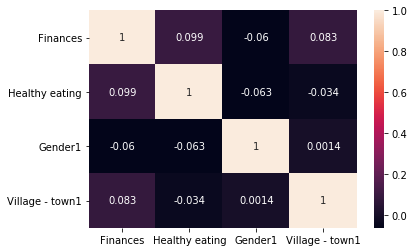

In [23]:
sns.heatmap(corr1, annot=True)

#### No strong correlation observed 

### Let us visualize this data to gather more information

In [24]:
Habits['Gender'].value_counts(),Habits['Gender'].count()

(female    599
 male      411
 Name: Gender, dtype: int64, 1010)

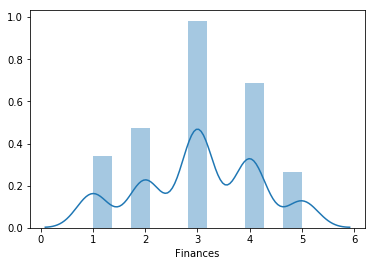

In [25]:
# Habits['Finances'].plot(kind='hist',bins=40)
sns.distplot(Habits['Finances'])

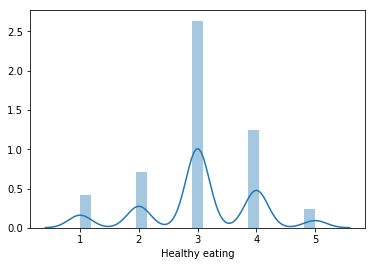

In [26]:
sns.distplot(Habits['Healthy eating'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0254625F8>,
      dtype=object)

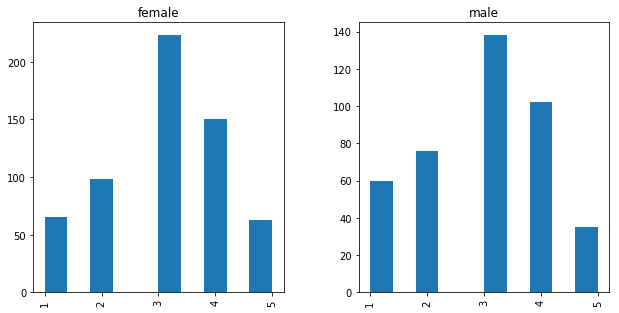

In [27]:
#Habits.hist(figsize=(10,5))
Habits.hist(by='Gender',column = 'Finances', figsize=(10,5))

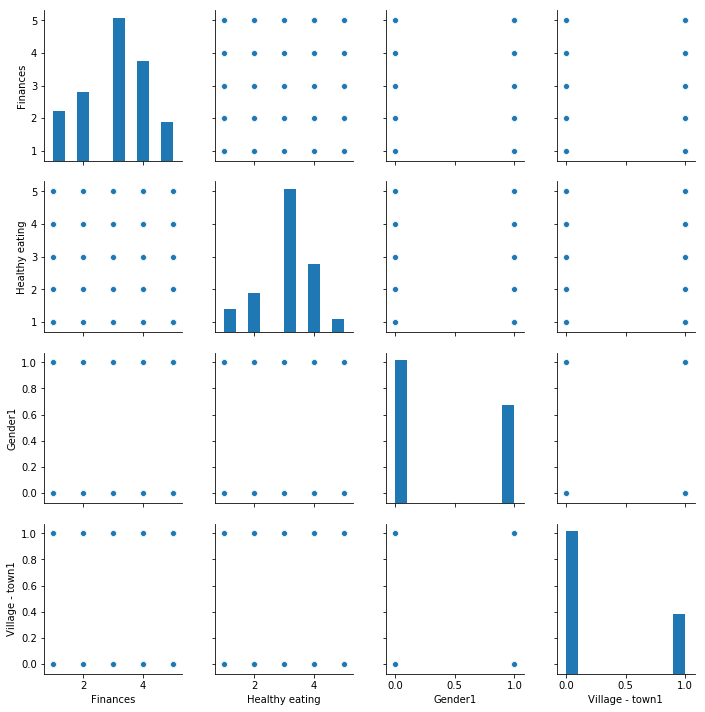

In [44]:
sns.pairplot(Habits)

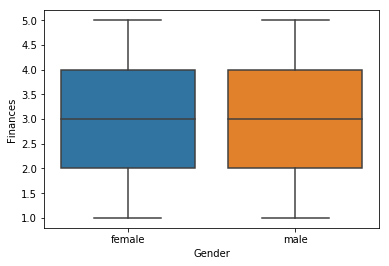

In [28]:
sns.boxplot(x = 'Gender', y = 'Finances', data = Habits)

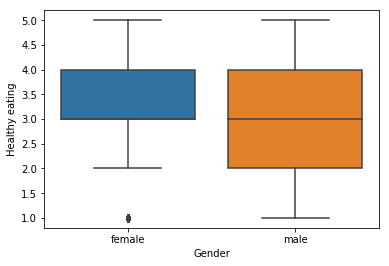

In [29]:
sns.boxplot(x = 'Gender', y = 'Healthy eating', data = Habits)

### Looks like there are outliers

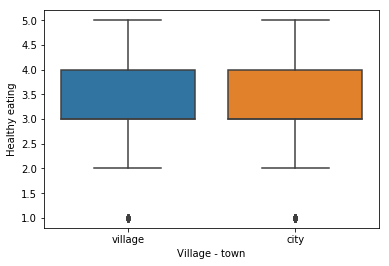

In [30]:
sns.boxplot(x = 'Village - town', y = 'Healthy eating', data = Habits)

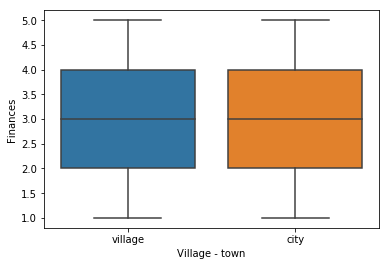

In [31]:
sns.boxplot(x = 'Village - town', y = 'Finances', data = Habits)

#### From the visualization seems that Gender vs  finances & healthy lifestyle  is independent, no correlation.
#### Also Village-town vs Finances & health seems independent

#####  So ,1) H0 = management of  Finances(saving money ) is Gender independent
#####         Ha = Gender and  management of  Finances is not independent , ie gender dependent

#####  and , 2)H0 = Gender and  healthy lifestyle are independent 
#####         Ha = Gender and  healthy lifestyle is not independent(Women have a Healthier Lifestyle than Men)





####  Also ,3) H0 = Village-Town and management of finances is  independent
####          Ha = Village-Town and management of finances is not independent

####  and , 4)H0 = Village-Town and  healthy lifestyle is independent 
####         Ha = Village-Town and   healthy lifestyle is not independent(Village People Healthier than City People)

This is independent categorical data so from scipy.stats import chisquare,chi2_contingency

In [32]:
from scipy.stats import chisquare,chi2_contingency

In [33]:
Gender_Fin = pd.crosstab(Habits["Finances"],Habits["Gender"])
Gender_Fin

Gender,female,male
Finances,,
1.0,65,60
2.0,98,76
3.0,223,138
4.0,150,102
5.0,63,35


In [34]:
chi2_contingency(Gender_Fin)

(5.328890527727397,
 0.25518454225298753,
 4,
 array([[ 74.13366337,  50.86633663],
        [103.19405941,  70.80594059],
        [214.0980198 , 146.9019802 ],
        [149.45346535, 102.54653465],
        [ 58.12079208,  39.87920792]]))

#### The p-value is greater than  0.05(the level of significace) hence they are actually independent, we fail to reject hypothesis. 

In [35]:
Gender_health = pd.crosstab(Habits["Healthy eating"],Habits["Gender"])
Gender_health

Gender,female,male
Healthy eating,,
1.0,36,45
2.0,67,70
3.0,329,178
4.0,147,92
5.0,20,26


In [36]:
chi2_contingency(Gender_health)

(25.36227460265698,
 4.253772381630619e-05,
 4,
 array([[ 48.03861386,  32.96138614],
        [ 81.25049505,  55.74950495],
        [300.68613861, 206.31386139],
        [141.74356436,  97.25643564],
        [ 27.28118812,  18.71881188]]))

#### Since p-value is less than  0.05(the level of significace) hence, reject hypothesis.Women have healthier lifestyle to man.

In [37]:
Village_town_health = pd.crosstab(Habits["Healthy eating"],Habits["Village - town"])
Village_town_health

Village - town,city,village
Healthy eating,,
1.0,58,23
2.0,88,49
3.0,356,151
4.0,177,62
5.0,32,14


In [38]:
chi2_contingency(Village_town_health)

(4.1147196478012065,
 0.3907028106705499,
 4,
 array([[ 57.02079208,  23.97920792],
        [ 96.44257426,  40.55742574],
        [356.90792079, 150.09207921],
        [168.24653465,  70.75346535],
        [ 32.38217822,  13.61782178]]))

#### The p-value is greater than  0.05(the level of significace) hence independent , we fail to reject hypothesis.

In [39]:
Village_town_Finances = pd.crosstab(Habits["Finances"],Habits["Village - town"])
Village_town_Finances

Village - town,city,village
Finances,,
1.0,88,37
2.0,133,41
3.0,265,96
4.0,168,84
5.0,57,41


In [40]:
chi2_contingency(Village_town_Finances)

(13.336002693956441,
 0.009745541835991274,
 4,
 array([[ 87.9950495 ,  37.0049505 ],
        [122.48910891,  51.51089109],
        [254.12970297, 106.87029703],
        [177.3980198 ,  74.6019802 ],
        [ 68.98811881,  29.01188119]]))

#### Since p-value is less than 0.05, the level of significace, hence,reject hypothesis.Village people manage better in terms of saving

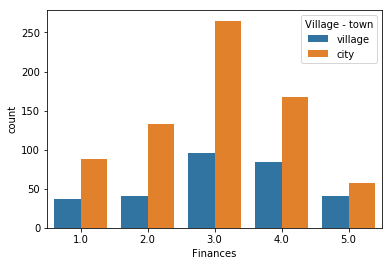

In [41]:
sns.countplot(x='Finances', hue = "Village - town", data = Habits)

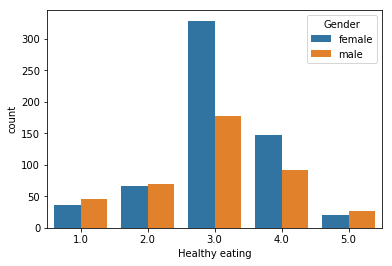

In [42]:
sns.countplot(x='Healthy eating', hue = "Gender", data = Habits)

#####  So after analysing and at 95% confidence level , our inference is:

######   1) Saving money (finances) is not  gender dependant.Since p-value is high, therfore no significant relationship observed.
######   2) There are differences in money saving (finances) between people from city or village.Rejecting the hypothesis
######   3) Women do have a Healthier Lifestyle than Men.As low p-value , so significant difference. Reject the hypothesis 
######   4) No evidence of Village People Healthier than City People, as p-value is high.Cannot reject the hypothesis


## END 